In [2]:
import numpy as np
import pandas as pd


In [3]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
import os

print(os.listdir())


['.config', 'spam.csv', 'sample_data']


In [5]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin1')


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum() #check missing values

,0
target,0
text,0


In [16]:
# duplicated values
df.duplicated().sum()


np.int64(403)

In [17]:
df = df.drop_duplicates(keep='first') #removed duplicates

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


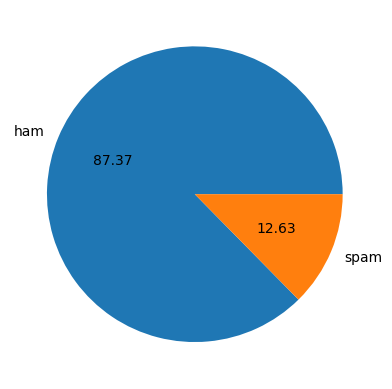

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['num_character'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
from nltk.tokenize import wordpunct_tokenize

df['num_words'] = df['text'].apply(lambda x: len(wordpunct_tokenize(x)))


In [28]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [29]:
import re

# Split on punctuation followed by space (simple sentence splitter)
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+\s', x.strip())))

In [30]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [31]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,19.202747,2.076030
std,58.236293,13.963696,1.511765
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,28.000000,3.000000
max,910.000000,210.000000,39.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

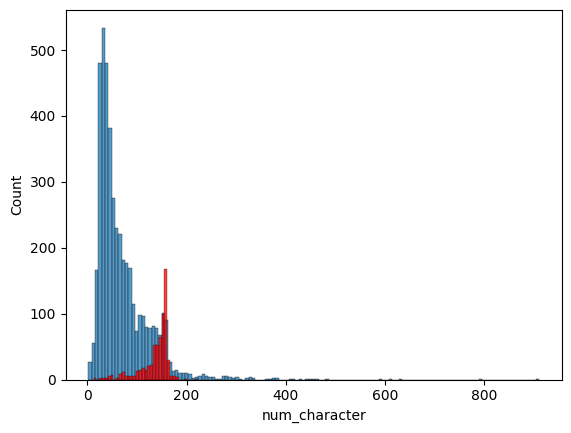

In [33]:
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'],color='red')

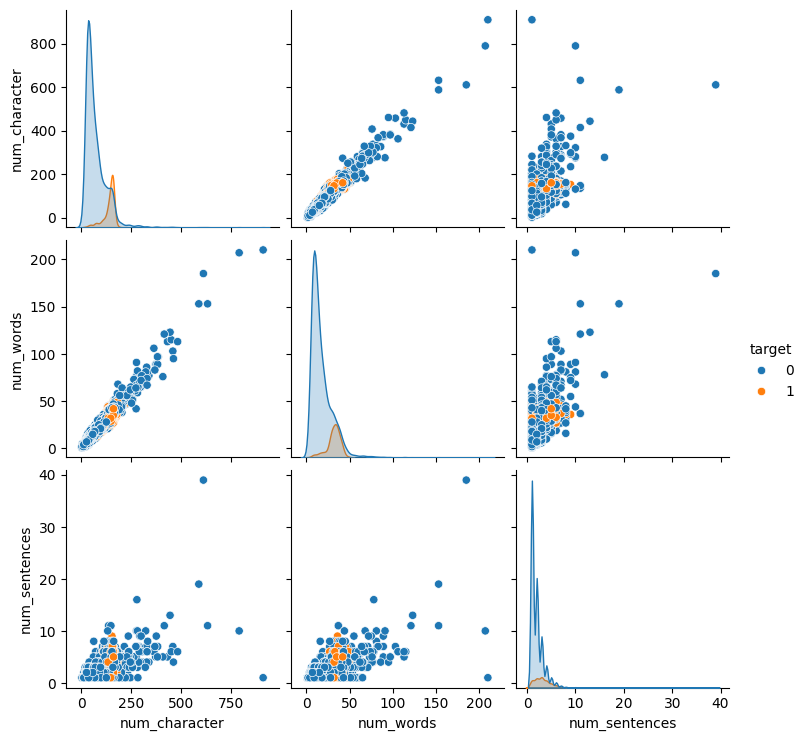

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


<Axes: >

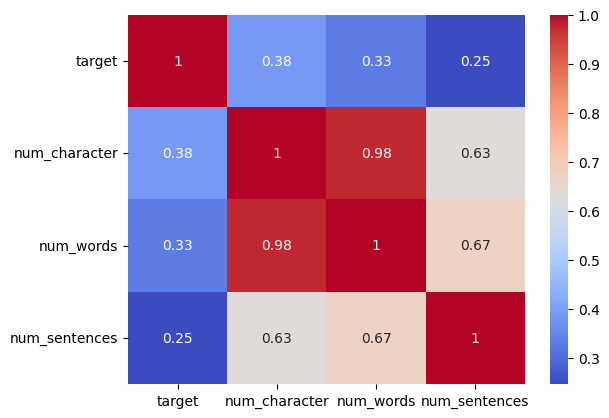

In [36]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Data Processing
##lower case
##Tokenizer
##removing special character
##removing stop words and punctuation
##stemming


In [37]:
import re
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stemmer = SnowballStemmer('english')

def transform_text(text):
    # Lowercase
    text = text.lower()

    # Keep only words and numbers
    tokens = re.findall(r'\b\w+\b', text)

    # Remove stopwords
    filtered = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

    # Apply stemming
    stemmed = [stemmer.stem(word) for word in filtered]

    return " ".join(stemmed)


In [38]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
df['transformed text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah don t think goe usf live


In [42]:
spam_corpus = []                   ### it gives us the transformed words

for msg in df[df['target'] == 1]['transformed text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [43]:
len(spam_corpus)

11402

In [44]:
from collections import Counter
Counter(spam_corpus).most_common(30)  ## top 30 most frequency words

[('å', 247),
 ('free', 195),
 ('2', 184),
 ('u', 147),
 ('txt', 134),
 ('text', 128),
 ('ur', 119),
 ('mobil', 118),
 ('4', 114),
 ('stop', 109),
 ('repli', 103),
 ('claim', 98),
 ('1', 93),
 ('prize', 83),
 ('www', 83),
 ('t', 76),
 ('s', 75),
 ('week', 75),
 ('min', 71),
 ('tone', 70),
 ('just', 67),
 ('cash', 65),
 ('servic', 65),
 ('150p', 64),
 ('new', 64),
 ('uk', 63),
 ('send', 61),
 ('won', 61),
 ('nokia', 59),
 ('urgent', 58)]

In [45]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah don t think goe usf live


# Model building

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [87]:
x = tf.fit_transform(df['transformed text']).toarray()

In [88]:
x.shape

(5169, 3000)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [89]:
y = df['target'].values

In [90]:
y
y.shape

(5169,)

In [91]:
from sklearn.model_selection import train_test_split


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [93]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [94]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

0.8713733075435203
[[782 114]
 [ 19 119]]
0.5107296137339056


In [96]:
mnb.fit(X_train, Y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


In [97]:
bnb.fit(X_train, Y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


### we are taking multinomialNB

In [98]:
import pickle
pickle.dump(tf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))